<a href="https://colab.research.google.com/github/KumariAnjaliRout/Hidden-Cost-of-Living/blob/main/Hidden_Cost_of_Living.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
from google.colab import files
uploaded = files.upload()


Saving Expense.csv to Expense.csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the uploaded CSV
df = pd.read_csv("Expense.csv")

# Preview the data
df.head()



,States/UTs,Rice,Wheat,Atta (Wheat),Gram Dal,Tur/Arhar Dal,Urad Dal,Moong Dal,Masoor Dal,Sugar,...,Soya Oil (Packed),Sunflower Oil (Packed),Palm Oil (Packed),Gur,Tea Loose,Salt Pack (Iodised),Potato,Onion,Tomato,Rent
0,Average Price,41.91,31.18,36.89,85.83,122.89,115.87,110.83,87.73,46.08,...,146.85,160.2,131.73,55.02,270.46,21.58,24.7,26.44,32.5,6700
1,Maximum Price,63.00,53,70.00,140.00,183,157,140.00,130.00,60.00,...,189,239,182,140.00,600.00,32.00,60.0,73.00,107.0,18000
2,Minimum Price,24.00,22,26.00,68.00,95,83,84.00,74.00,39.00,...,113,122,88,35.00,152.00,10.00,11.0,10.00,9.0,4000
3,Modal Price,40.00,27,35.00,85.00,120,110,110.00,90.00,45.00,...,148,165,132,50.00,240.00,20.00,20.0,20.00,30.0,5000
4,Andaman and Nicobar,53.50,,60.00,96.00,126,133,126.50,100.00,56.00,...,,176,166.5,76.00,350.00,20.50,60.0,55.00,75.0,7000


In [5]:
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')



In [6]:
df["Total Expense"] = df.iloc[:, 1:].sum(axis=1)



In [7]:
df_sorted = df.sort_values(by="Total Expense", ascending=False)
df_sorted.reset_index(drop=True, inplace=True)
df_sorted.head()


,States/UTs,Rice,Wheat,Atta (Wheat),Gram Dal,Tur/Arhar Dal,Urad Dal,Moong Dal,Masoor Dal,Sugar,...,Sunflower Oil (Packed),Palm Oil (Packed),Gur,Tea Loose,Salt Pack (Iodised),Potato,Onion,Tomato,Rent,Total Expense
0,Maximum Price,63.00,53.00,70.00,140.00,183.00,157.00,140.00,130.00,60.00,...,239.00,182.00,140.00,600.00,32.00,60.00,73.00,107.00,18000.0,21428.00
1,Maharashtra,46.11,37.63,43.74,85.58,122.74,120.11,115.74,92.21,44.32,...,160.05,139.56,57.16,312.74,24.84,29.84,25.47,33.53,18000.0,20228.74
2,Karnataka,47.32,41.64,44.57,84.68,114.68,120.14,110.25,88.82,44.26,...,156.52,129.19,52.04,243.74,18.00,30.56,24.37,21.63,16000.0,18085.86
3,Gujarat,34.90,33.50,35.30,89.30,118.00,117.10,105.20,88.40,43.40,...,156.20,146.10,54.00,207.10,18.90,29.40,28.80,36.40,12000.0,14024.60
4,Tamil Nadu,54.43,46.55,57.48,87.65,120.00,116.09,113.91,89.60,46.17,...,161.48,132.61,58.74,292.65,26.09,37.48,31.00,27.87,9500.0,11618.64


<ipython-input-9-3475570801>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x="Total Expense", y="States/UTs", palette="viridis")


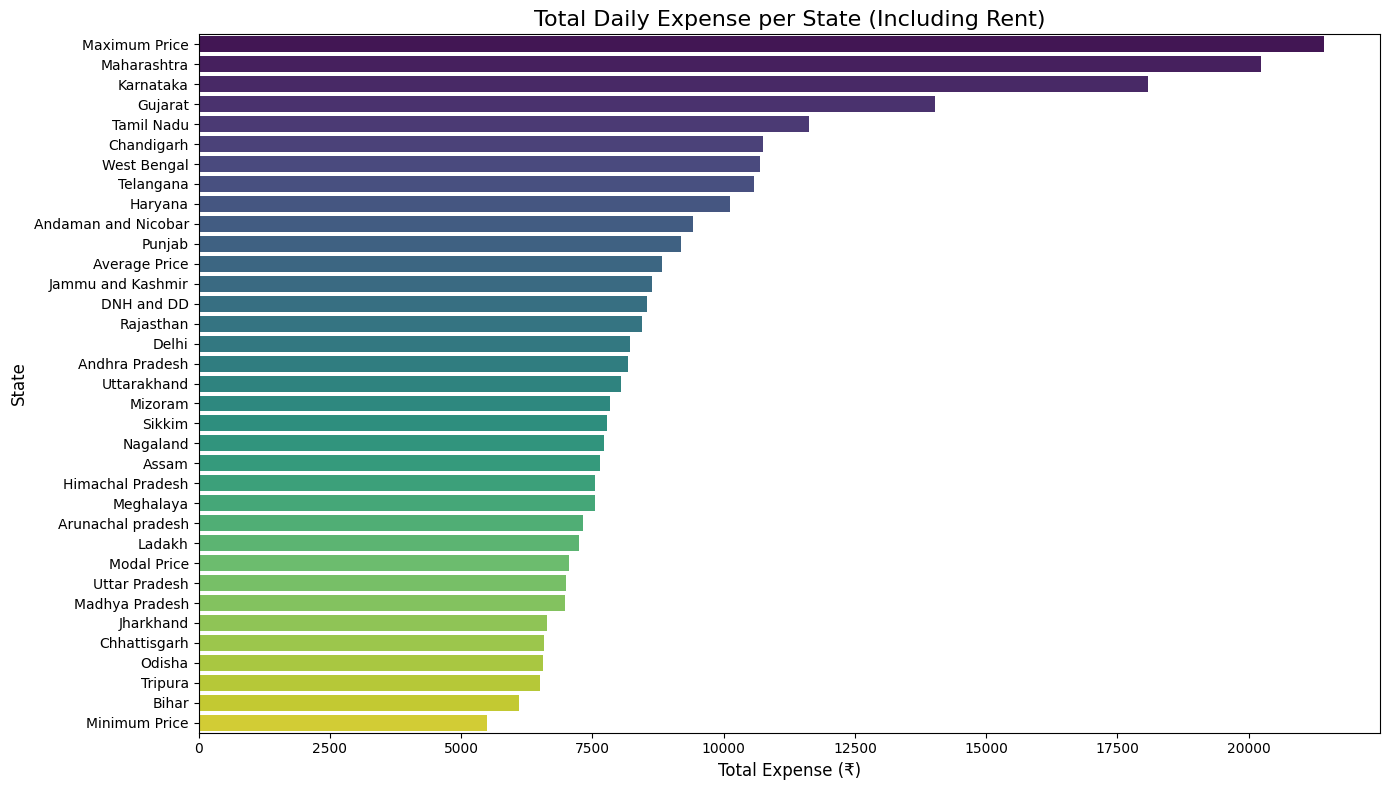

In [9]:
plt.figure(figsize=(14, 8))
sns.barplot(data=df_sorted, x="Total Expense", y="States/UTs", palette="viridis")
plt.title("Total Daily Expense per State (Including Rent)", fontsize=16)
plt.xlabel("Total Expense (₹)", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.tight_layout()
plt.show()


In [66]:
df_sorted.to_csv("total_expense_with_rent.csv", index=False)


In [11]:
files.download("Expense.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
print("Average Total Expense: ₹", df["Total Expense"].mean())
print("Maximum Expense: ₹", df['Total Expense'].max())
print("Minimum Expense: ₹", df['Total Expense'].min())


Average Total Expense: ₹ 9016.241388888891
Maximum Expense: ₹ 21428.0
Minimum Expense: ₹ 0.0


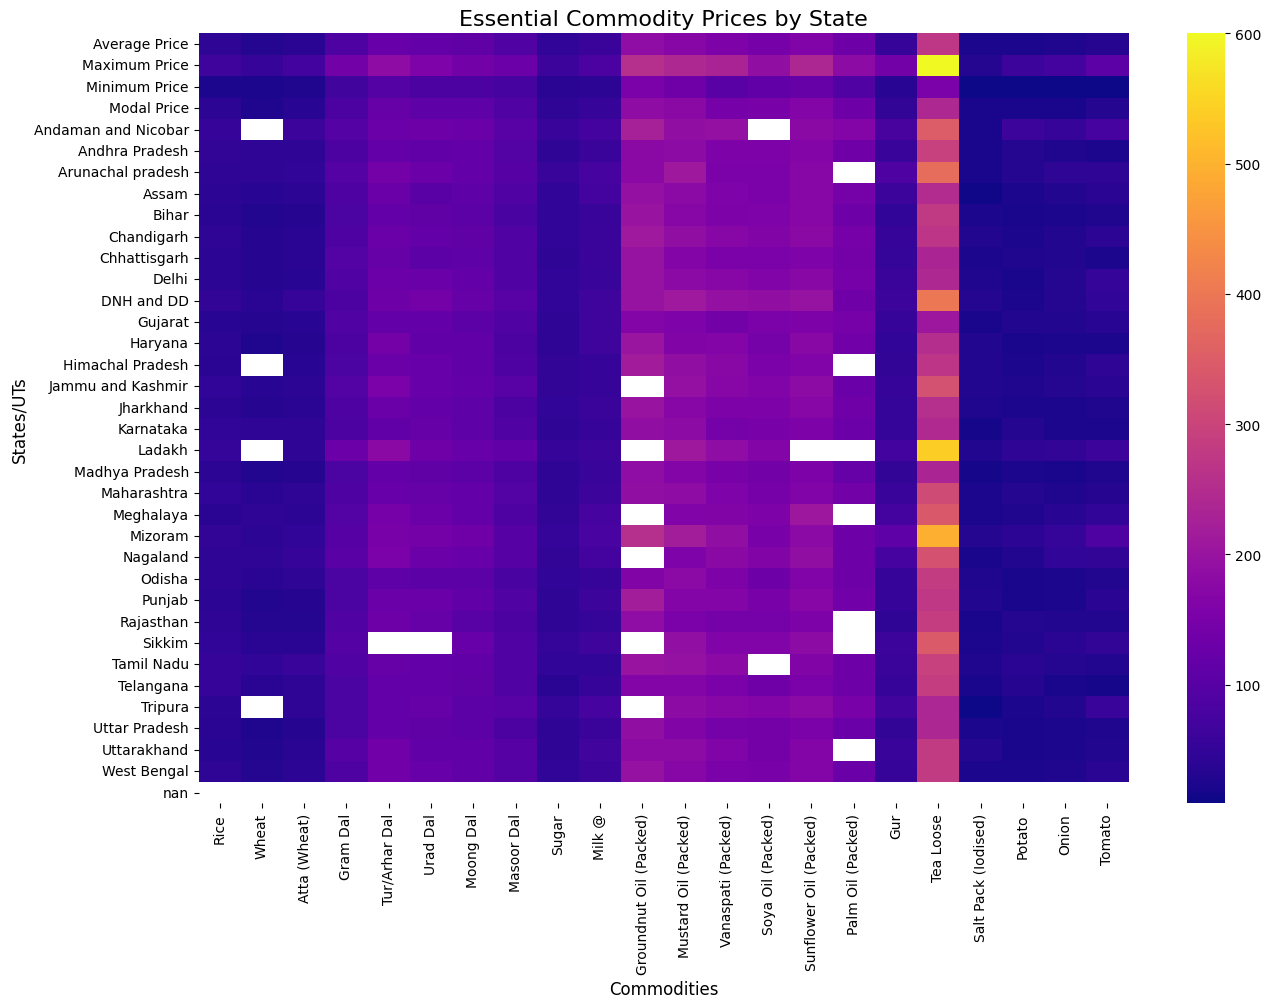

In [22]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.set_index("States/UTs").iloc[:, :-2], cmap="plasma")
plt.title("Essential Commodity Prices by State", fontsize=16)
plt.xlabel("Commodities", fontsize=12)
plt.ylabel("States/UTs", fontsize=12)
plt.show()


<ipython-input-24-428242275>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Total Expense", y="States/UTs", data=top10, palette="Reds_r")


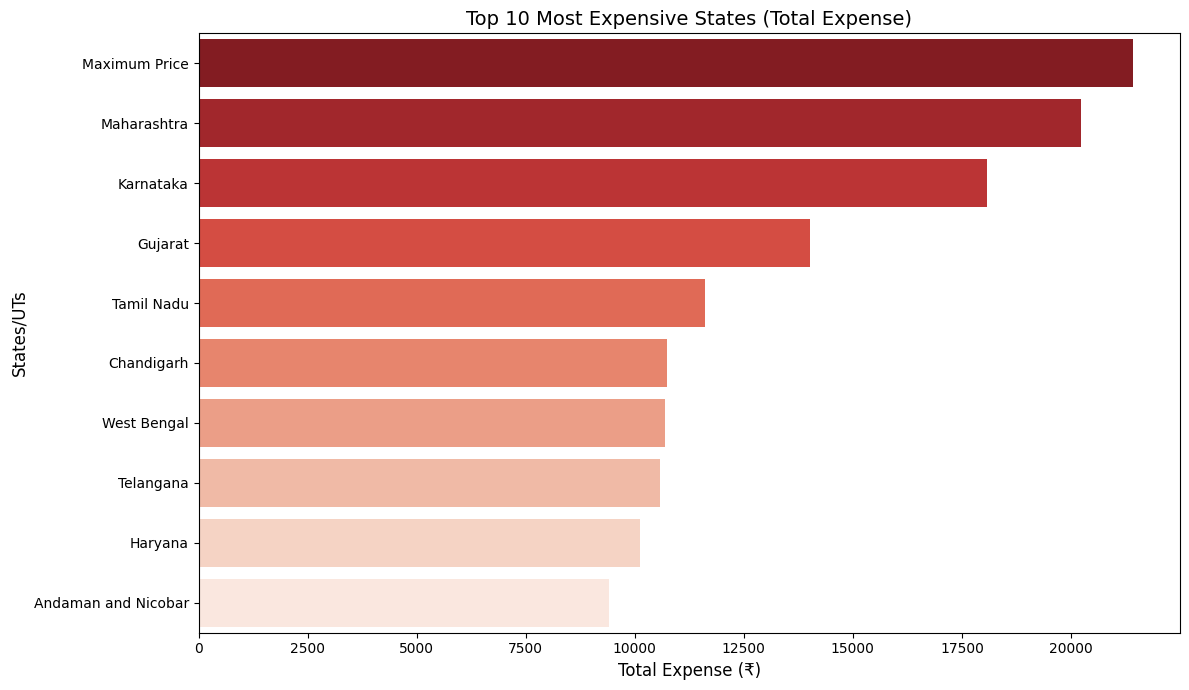

In [24]:

top10 = df.sort_values("Total Expense", ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x="Total Expense", y="States/UTs", data=top10, palette="Reds_r")
plt.title("Top 10 Most Expensive States (Total Expense)", fontsize=14)
plt.xlabel("Total Expense (₹)", fontsize=12)
plt.ylabel("States/UTs", fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-25-177285602>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Total Expense", y="States/UTs", data=bottom10, palette="Greens")


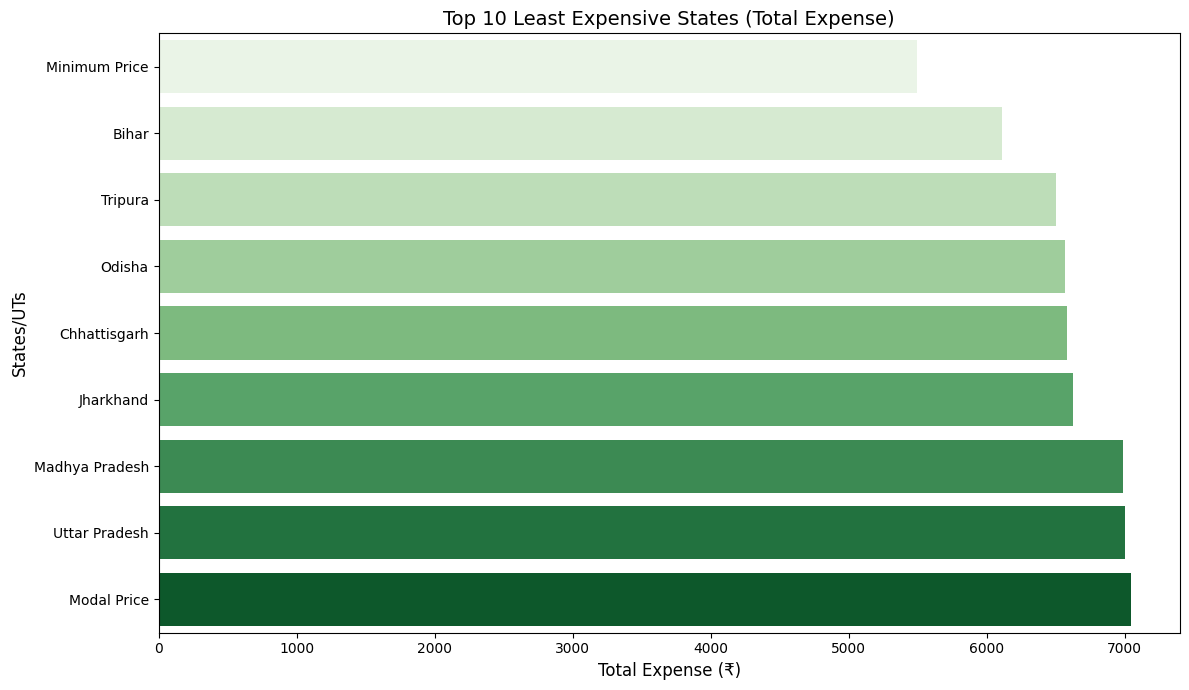

In [25]:
bottom10 = df.sort_values("Total Expense", ascending=True).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x="Total Expense", y="States/UTs", data=bottom10, palette="Greens")
plt.title("Top 10 Least Expensive States (Total Expense)", fontsize=14)
plt.xlabel("Total Expense (₹)", fontsize=12)
plt.ylabel("States/UTs", fontsize=12)
plt.tight_layout()
plt.show()

In [67]:
df.rename(columns=lambda x: x.strip(), inplace=True)


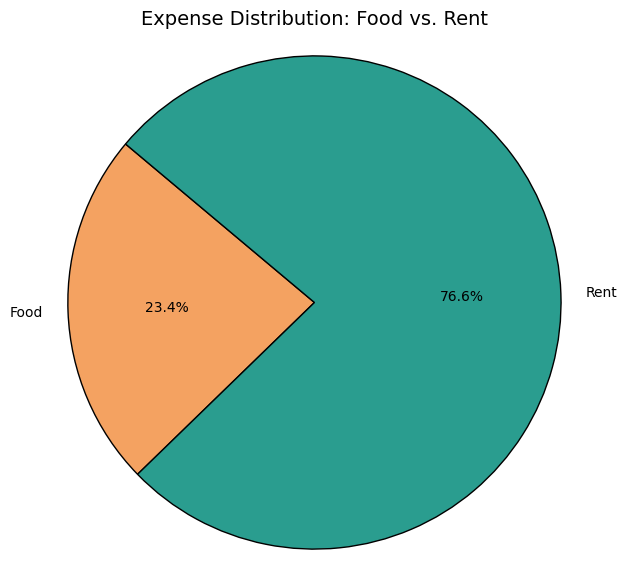

In [30]:
import matplotlib.pyplot as plt

# Total food and rent expense
total_food_expense = df.drop(columns=["States/UTs", "Rent", "Total Expense"]).sum().sum()
total_rent_expense = df["Rent"].sum()

# Pie chart
labels = ['Food', 'Rent']
sizes = [total_food_expense, total_rent_expense]
colors = ['#f4a261','#2a9d8f']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140,
        wedgeprops={'edgecolor': 'black'})
plt.title("Expense Distribution: Food vs. Rent", fontsize=14)
plt.axis('equal')
plt.show()


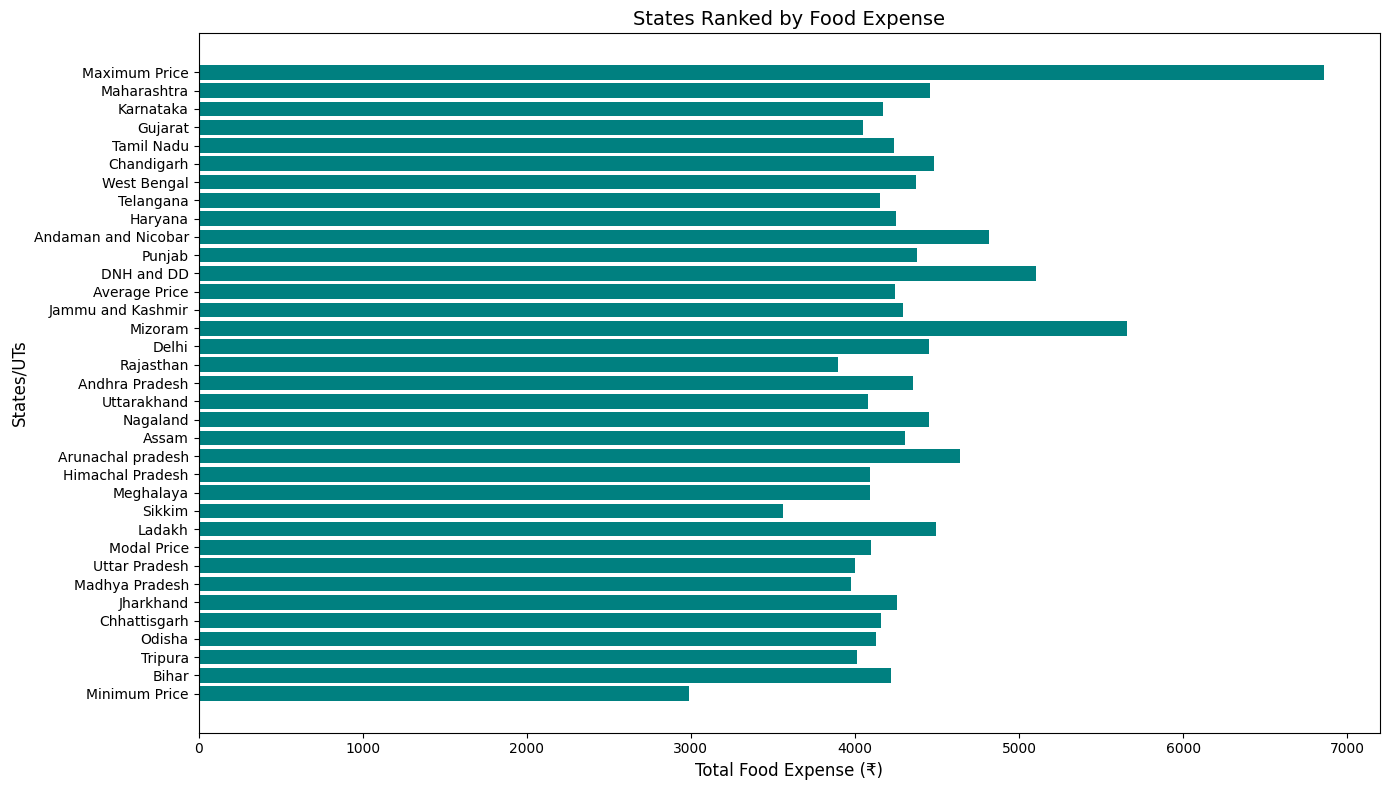

In [48]:


# Step 5: Plot
plt.figure(figsize=(14, 8))
plt.barh(df_sorted['States/UTs'], df_sorted['Food Expense'], color='teal')
plt.xlabel('Total Food Expense (₹)', fontsize=12)
plt.ylabel('States/UTs', fontsize=12)
plt.title('States Ranked by Food Expense', fontsize=14)
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()



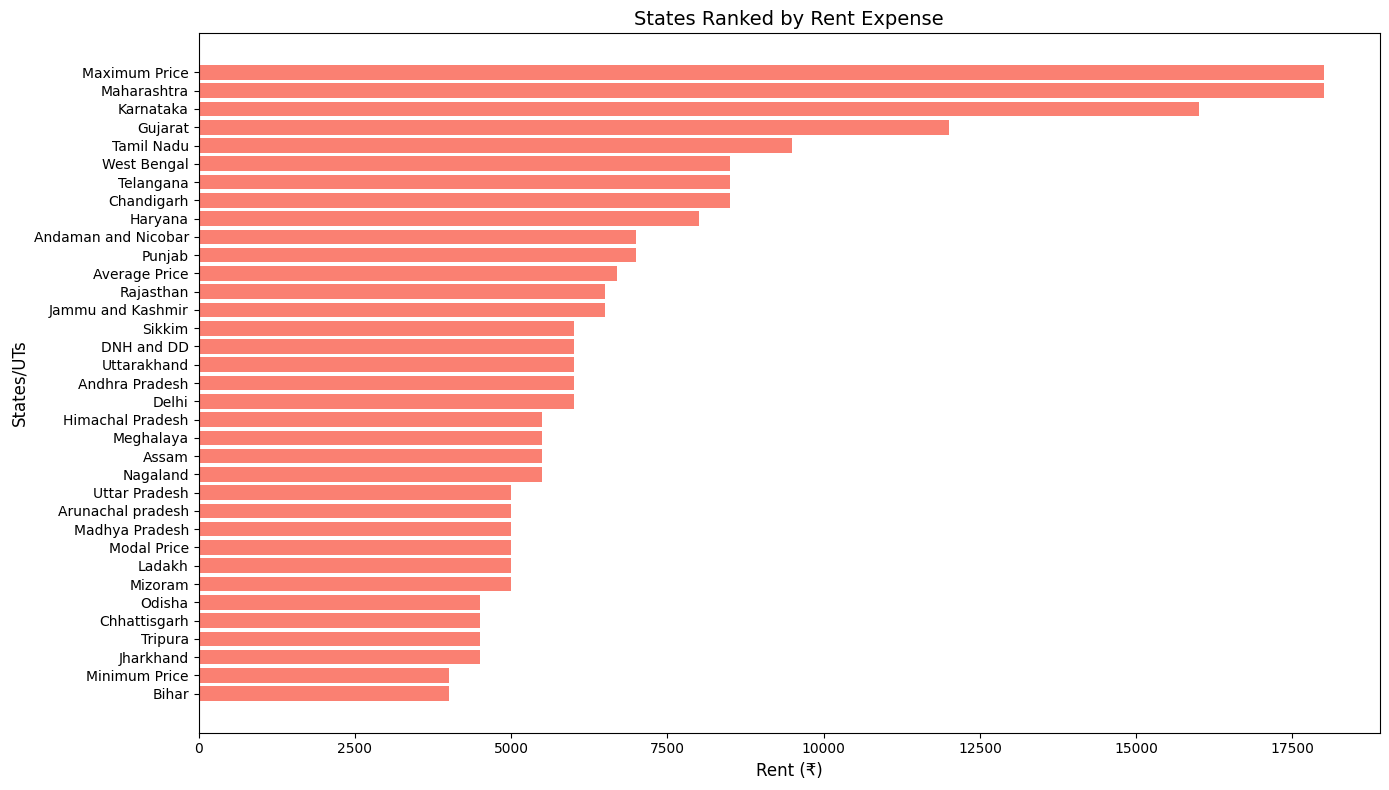

In [49]:

# Step 5: Plot
plt.figure(figsize=(14, 8))
plt.barh(df_rent_sorted['States/UTs'], df_rent_sorted['Rent'], color='salmon')
plt.xlabel('Rent (₹)', fontsize=12)
plt.ylabel('States/UTs', fontsize=12)
plt.title('States Ranked by Rent Expense', fontsize=14)
plt.gca().invert_yaxis()  # Highest rent on top
plt.tight_layout()
plt.show()

In [56]:
# Calculate Daily Expense as the sum of all food item columns (excluding Rent and State)
food_columns = df.columns.difference(['States/UTs', 'Rent'])  # exclude non-food
df["Daily Expense"] = df[food_columns].sum(axis=1)


In [58]:
# Monthly and Annual expenses
df["Monthly Expense"] = df["Daily Expense"] * 30
df["Annual Food+Essentials"] = df["Monthly Expense"] * 12
df["Annual Rent"] = df["Rent"] * 12

# Total core expense and buffer
df["Total Core Expense"] = df["Annual Food+Essentials"] + df["Annual Rent"]
df["Required Annual Income"] = df["Total Core Expense"] * 1.25  # adding 25% buffer

# Round off for clarity
df["Required Annual Income"] = df["Required Annual Income"].round(0)


<ipython-input-59-3977086183>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_income.head(10), x="Required Annual Income", y="States/UTs", palette="coolwarm")


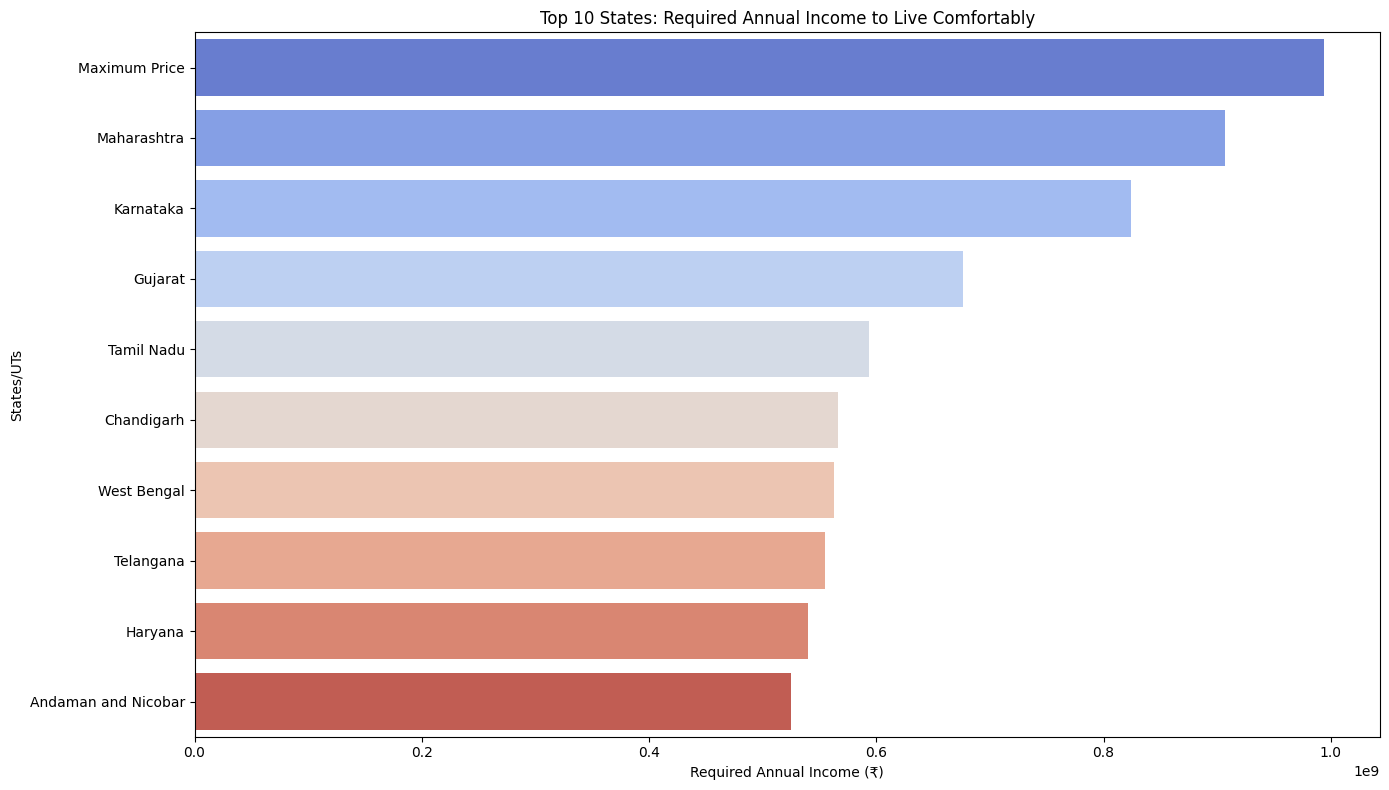

In [59]:
# Sort and plot
df_income = df[["States/UTs", "Required Annual Income"]].sort_values(by="Required Annual Income", ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=df_income.head(10), x="Required Annual Income", y="States/UTs", palette="coolwarm")
plt.title("Top 10 States: Required Annual Income to Live Comfortably")
plt.xlabel("Required Annual Income (₹)")
plt.ylabel("States/UTs")
plt.tight_layout()
plt.show()


<ipython-input-62-3208315780>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


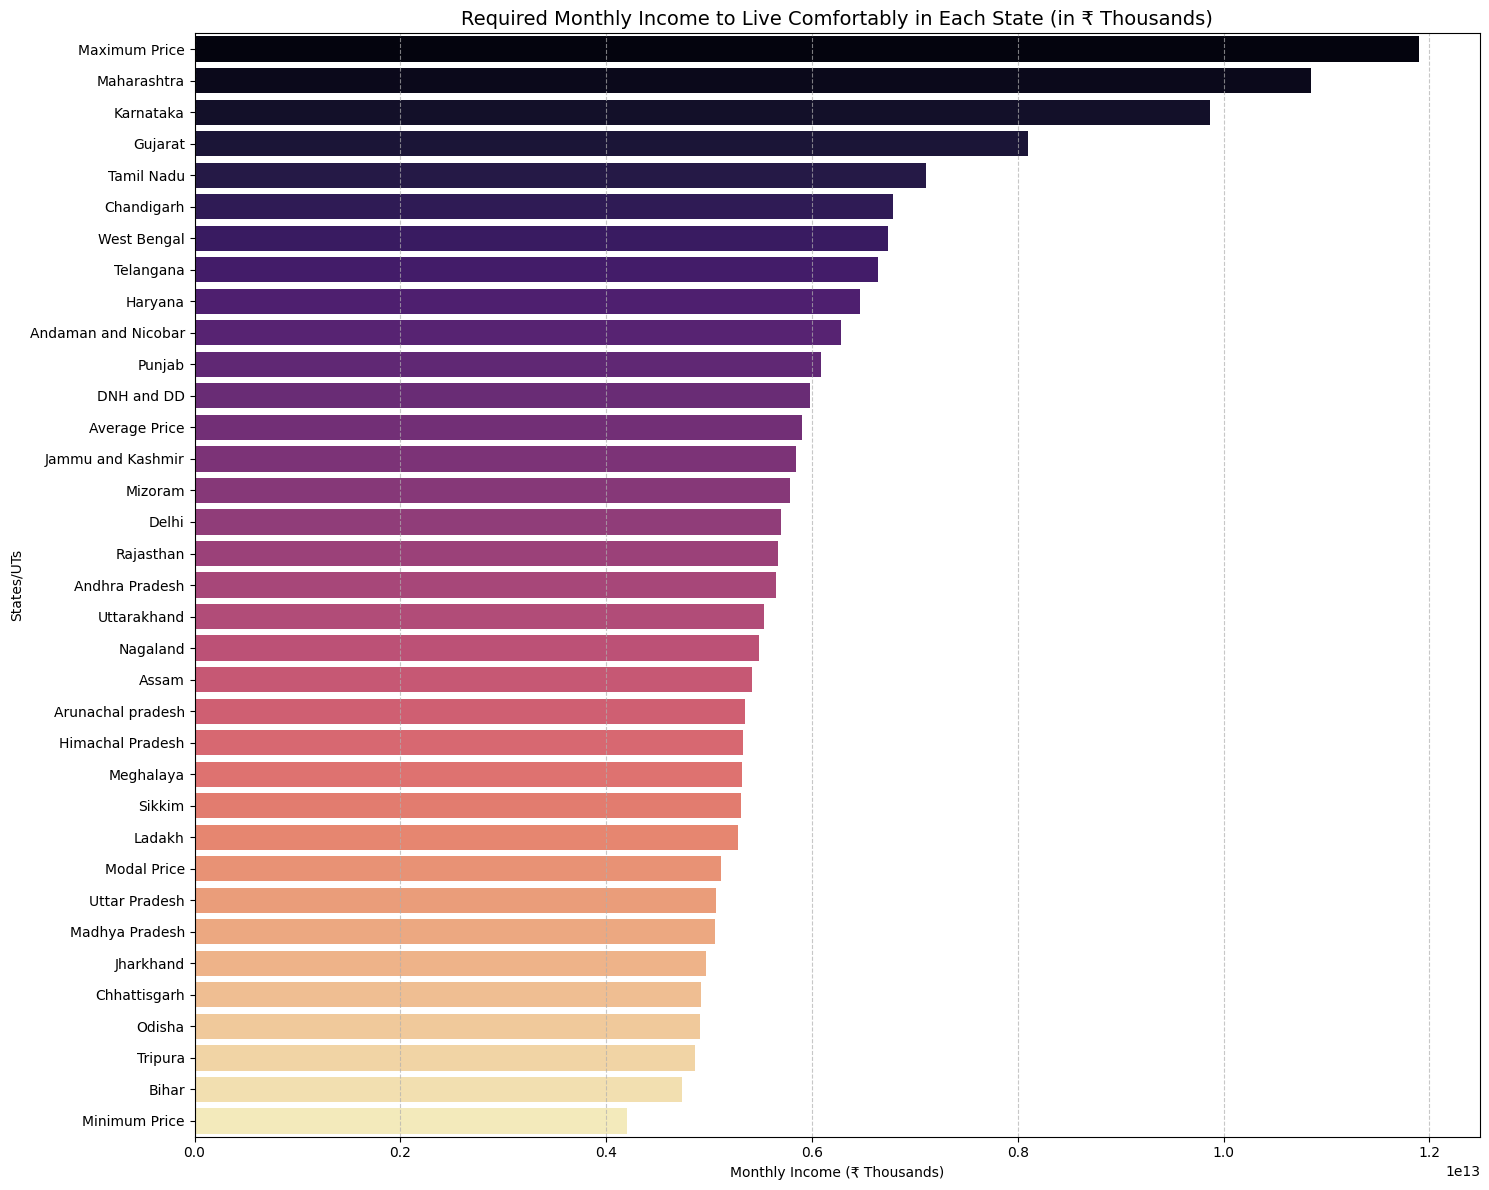

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate Daily Expense (sum of all food columns)
food_columns = df.columns.difference(['States/UTs', 'Rent'])  # excluding 'States/UTs' and 'Rent'
df["Daily Expense"] = df[food_columns].sum(axis=1)

# Step 2: Monthly Expense
df["Monthly Food+Essentials"] = df["Daily Expense"] * 30
df["Monthly Rent"] = df["Rent"]  # already monthly
df["Total Monthly Expense"] = df["Monthly Food+Essentials"] + df["Monthly Rent"]

# Step 3: Add 25% buffer to compute monthly income required
df["Required Monthly Income"] = df["Total Monthly Expense"] * 1.25

# Convert to Thousands for display (₹1000 = 1K)
df["Required Monthly Income (₹ Thousands)"] = (df["Required Monthly Income"] / 1e3).round(2)

# Step 4: Plot the Bar Chart
plt.figure(figsize=(15, 12))
sns.barplot(
    data=df.sort_values("Required Monthly Income", ascending=False),
    x="Required Monthly Income (₹ Thousands)",
    y="States/UTs",
    palette="magma"
)
plt.title("Required Monthly Income to Live Comfortably in Each State (in ₹ Thousands)", fontsize=14)
plt.xlabel("Monthly Income (₹ Thousands)")
plt.ylabel("States/UTs")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
